<a href="https://colab.research.google.com/github/lucapug/dtc-stock-markets-analytics-zoomcamp/blob/main/cohorts/2024/SMA_zoomcamp_lab1_and_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install main library YFinance
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


# 1) Understanding Data-Driven Decisions data pulls

In [3]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=24
Period for indexes: 1954-04-24 to 2024-04-24 


## 1.1) GDP

In [4]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [5]:
new_var = 10.0 -1
12/(new_var)

1.3333333333333333

In [6]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail()

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2023-04-01,22246.23,0.021312,0.005442
2023-07-01,22369.71,0.021719,0.005551
2023-10-01,22495.19,0.022190,0.005609
2024-01-01,22618.15,0.022251,0.005466
2024-04-01,22739.00,0.022151,0.005343


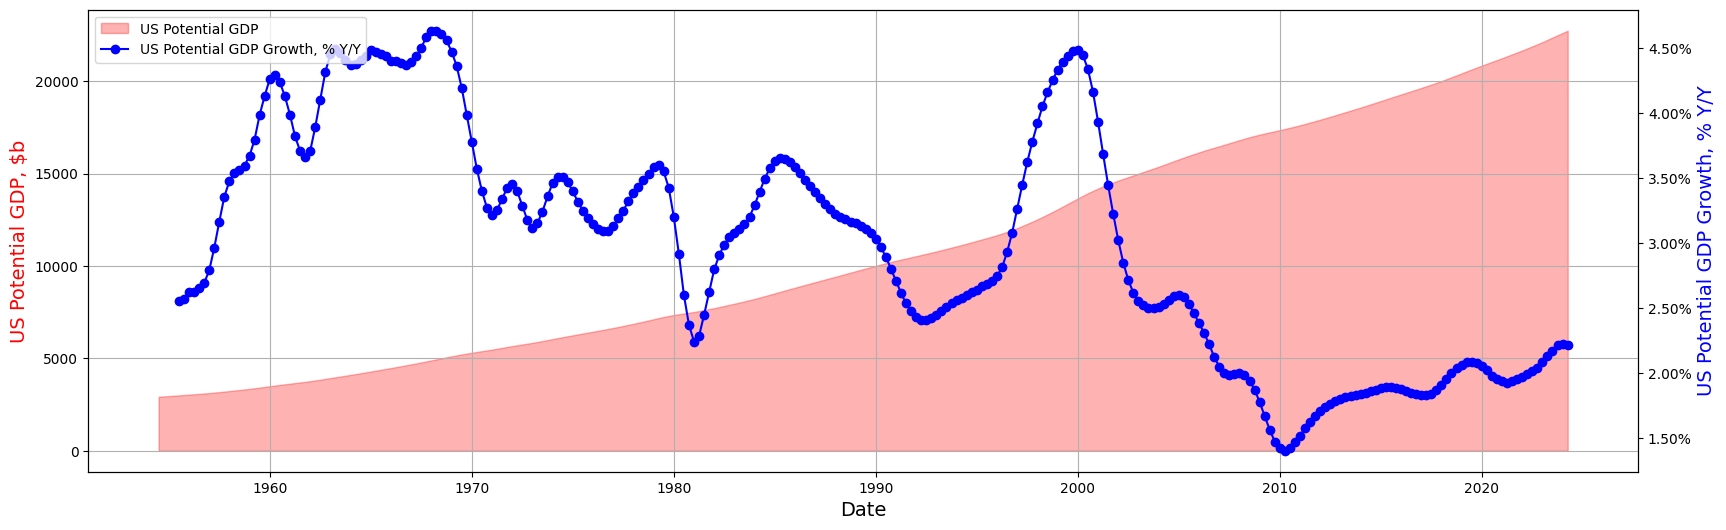

In [7]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.2) Inflation - CPI Core

In [8]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)

In [9]:
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2023-03-01,305.112,0.055601,0.003249
2023-04-01,306.539,0.055157,0.004677
2023-05-01,307.646,0.053322,0.003611
2023-06-01,308.245,0.048552,0.001947
2023-07-01,308.945,0.047076,0.002271
2023-08-01,309.656,0.044128,0.002301
2023-09-01,310.644,0.041437,0.003191
2023-10-01,311.390,0.040217,0.002401
2023-11-01,312.349,0.040151,0.003080


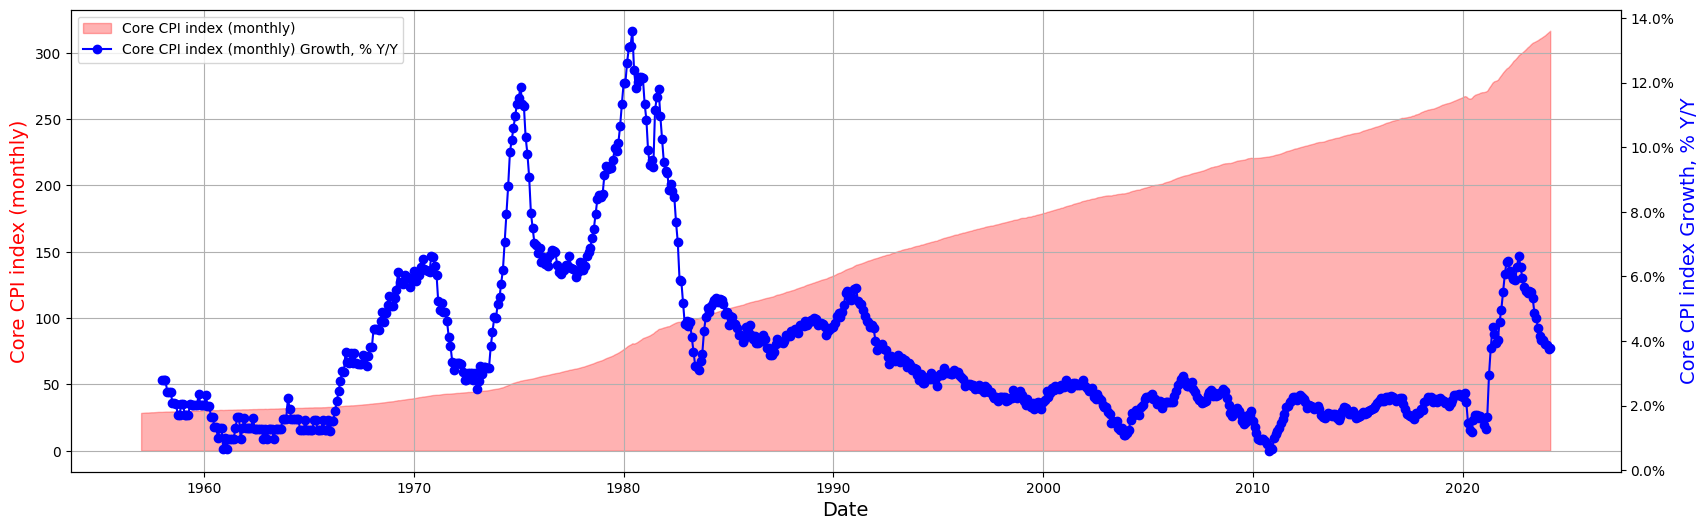

In [10]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.3 Interest rates

In [11]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail()

,FEDFUNDS
DATE,
2023-11-01,5.33
2023-12-01,5.33
2024-01-01,5.33
2024-02-01,5.33
2024-03-01,5.33


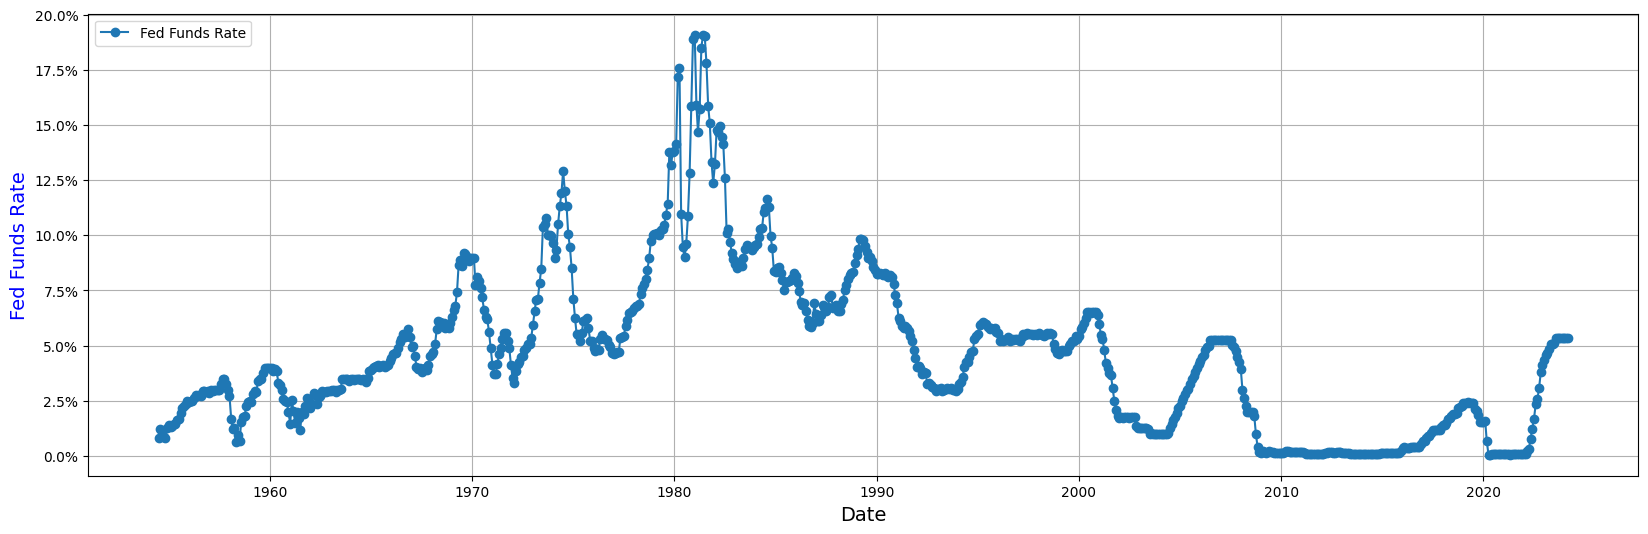

In [12]:
# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

In [13]:
#1-YEAR Treasury constant maturity rate (DGS1)
#Market Yield on U.S. Treasury Securities at 1-Year Constant Maturity, Quoted on an Investment Basis
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

,DGS1
DATE,
2024-04-16,5.18
2024-04-17,5.16
2024-04-18,5.18
2024-04-19,5.17
2024-04-22,5.16


Other rates for US Treasury: https://fred.stlouisfed.org/categories/115  
* https://fred.stlouisfed.org/series/DGS2
* https://fred.stlouisfed.org/series/DGS3
* https://fred.stlouisfed.org/series/DGS5
* https://fred.stlouisfed.org/series/DGS10
...

In [14]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

,DGS5
DATE,
2024-04-16,4.69
2024-04-17,4.62
2024-04-18,4.68
2024-04-19,4.66
2024-04-22,4.66


## 1.4 SNP500

In [15]:
# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-23,5028.85,5076.12,5027.96,5070.55,2.330851e+09
2024-04-22,4987.33,5038.84,4969.40,5010.60,2.352809e+09
2024-04-19,5005.44,5019.02,4953.56,4967.23,2.735280e+09
2024-04-18,5031.52,5056.66,5001.89,5011.12,2.217369e+09
2024-04-17,5068.97,5077.96,5007.25,5022.21,2.295628e+09


In [16]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

In [17]:
spx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2024-04-23,5028.85,5076.12,5027.96,5070.55,2.330851e+09,0.011965,0.042336,0.226691
2024-04-22,4987.33,5038.84,4969.40,5010.60,2.352809e+09,0.008731,0.033022,0.213282
2024-04-19,5005.44,5019.02,4953.56,4967.23,2.735280e+09,-0.008759,0.026327,0.195621
2024-04-18,5031.52,5056.66,5001.89,5011.12,2.217369e+09,-0.002208,0.048145,0.206083
2024-04-17,5068.97,5077.96,5007.25,5022.21,2.295628e+09,-0.005781,0.059715,0.209786


In [18]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

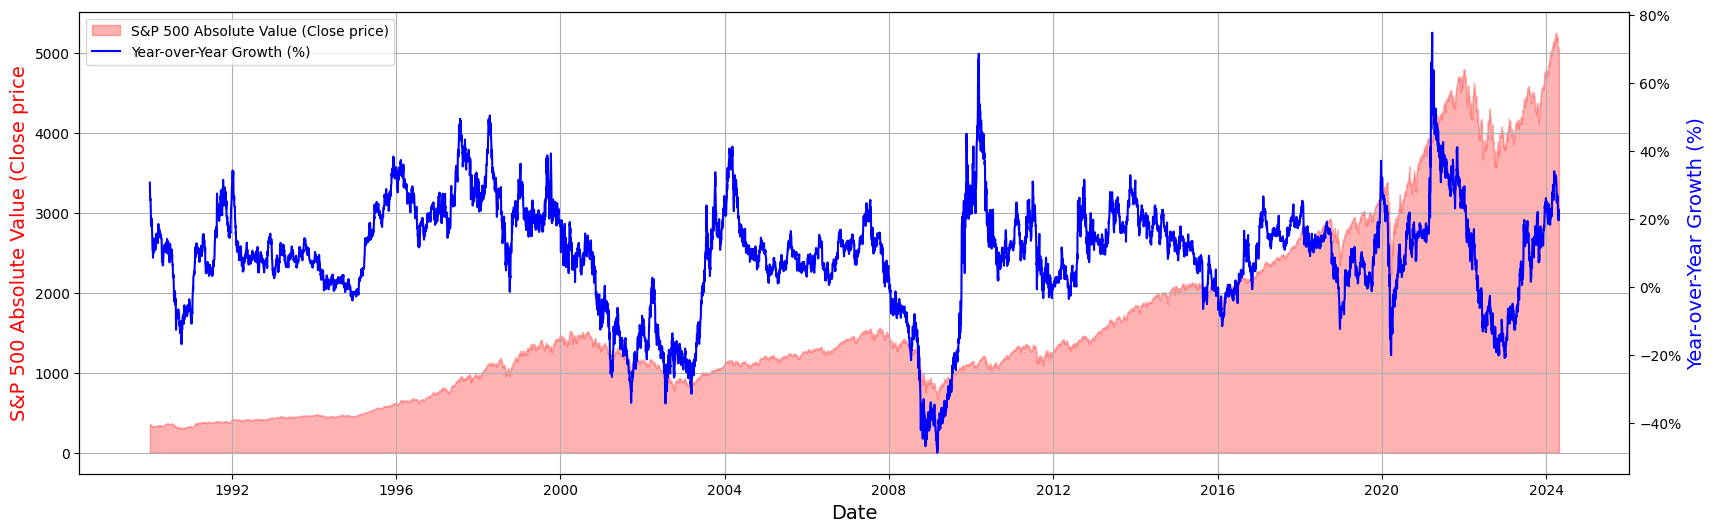

In [19]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# 2) Data Sources for Stocks

## 2.1 OHLCV data daily - INDEXES

In [20]:
# INDEXES from Yahoo Finance
# DAX index (XETRA - XETRA Delayed Price. Currency in EUR)
# WEB: https://finance.yahoo.com/quote/%5EGDAXI
dax_daily = yf.download(tickers = "^GDAXI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [21]:
dax_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,17775.410156,17863.320312,17716.919922,17837.400391,17837.400391,60700500
2024-04-19,17834.830078,17834.869141,17626.900391,17737.359375,17737.359375,79447700
2024-04-22,17738.039062,17889.470703,17738.039062,17860.800781,17860.800781,62454400
2024-04-23,17861.199219,18144.660156,17861.199219,18137.650391,18137.650391,68529200
2024-04-24,18140.189453,18226.320312,18060.259766,18088.699219,18088.699219,0


In [22]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] -1

In [23]:
dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,NaN,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,NaN,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,NaN,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-18,17775.410156,17863.320312,17716.919922,17837.400391,17837.400391,60700500,15863.950195,0.124398
2024-04-19,17834.830078,17834.869141,17626.900391,17737.359375,17737.359375,79447700,15872.129883,0.117516
2024-04-22,17738.039062,17889.470703,17738.039062,17860.800781,17860.800781,62454400,15795.730469,0.130736


<Axes: xlabel='Date'>

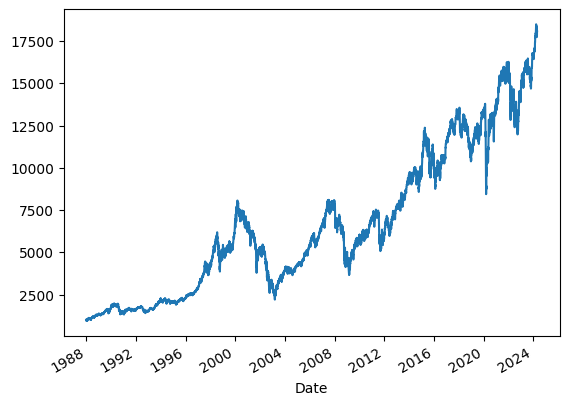

In [24]:
dax_daily['Adj Close'].plot.line()

In [25]:
# delayed 15 min : https://finance.yahoo.com/quote/%5ESPX/
# S&P 500 INDEX : Chicago Options - Chicago Options Delayed Price. Currency in USD
snp500_daily = yf.download(tickers = "^SPX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [26]:
snp500_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000
2024-04-22,4987.330078,5038.839844,4969.399902,5010.600098,5010.600098,3820250000
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000
2024-04-24,5084.859863,5089.479980,5047.020020,5073.279785,5073.279785,1690125107


In [27]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [28]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000
2024-04-22,4987.330078,5038.839844,4969.399902,5010.600098,5010.600098,3820250000
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000
2024-04-24,5084.859863,5089.479980,5047.020020,5073.000000,5073.000000,1776471000


In [29]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
dji_daily = yf.download(tickers = "^DJI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


## 2.2 OHLCV data daily - ETFs

In [30]:
# https://finance.yahoo.com/quote/VOO?.tsrc=fin-srch
voo_etf = yf.download(tickers = "VOO",
                     period = "max",
                     interval = "1d")


[*********************100%%**********************]  1 of 1 completed


In [31]:
voo_etf.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,461.359985,463.299988,458.209991,458.940002,458.940002,5637300
2024-04-19,458.989990,459.940002,453.899994,455.100006,455.100006,9766100
2024-04-22,457.549988,461.730011,455.350006,459.049988,459.049988,5818100
2024-04-23,461.179993,465.130005,460.670013,464.839996,464.839996,4257400
2024-04-24,465.570007,466.290009,462.450012,464.829987,464.829987,4251503


In [32]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [33]:
epi_etf_daily.head()
print(epi_etf_daily.shape)

(4069, 6)


In [34]:
# find dividends impact on Close vs. Adj.Close
epi_etf_daily[(epi_etf_daily.index >='2023-06-23') & (epi_etf_daily.index <='2023-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,34.029999,34.150002,33.930000,34.020000,33.960003,344100
2023-06-26,34.110001,34.160000,34.049999,34.080002,34.080002,634600
2023-06-27,34.279999,34.310001,34.230000,34.310001,34.310001,417100
2023-06-28,34.410000,34.529999,34.389999,34.529999,34.529999,454400


In [35]:
# find dividends - diff for Close vs. Adj Close
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
# HELP: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
epi_etf_daily[(epi_etf_daily.index >='2022-06-23') & (epi_etf_daily.index <='2022-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-23,31.129999,31.26,31.000000,31.200001,29.303230,607700
2022-06-24,29.549999,29.91,29.500000,29.900000,29.847267,387900
2022-06-27,29.799999,29.82,29.660000,29.709999,29.657600,225400
2022-06-28,29.709999,29.76,29.389999,29.420000,29.368114,466600


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

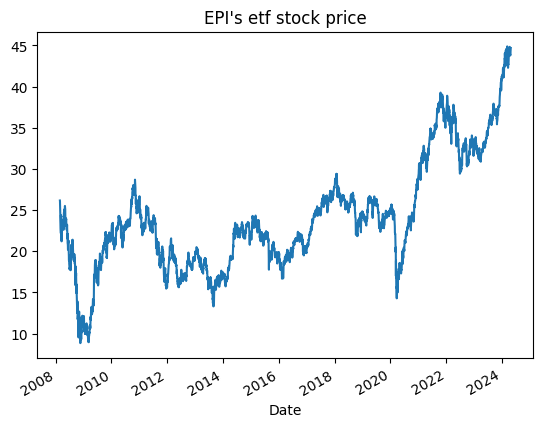

In [36]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

epi_etf_daily['Close'].plot(title="EPI's etf stock price")

In [37]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [38]:
# get dividends as Series
epi.get_dividends()

Date
2008-12-22 00:00:00-05:00    0.091
2009-03-23 00:00:00-04:00    0.007
2009-06-22 00:00:00-04:00    0.002
2009-09-21 00:00:00-04:00    0.045
2009-12-21 00:00:00-05:00    0.006
2010-06-28 00:00:00-04:00    0.065
2010-09-20 00:00:00-04:00    0.065
2010-12-22 00:00:00-05:00    0.013
2011-06-22 00:00:00-04:00    0.062
2011-09-26 00:00:00-04:00    0.098
2012-03-26 00:00:00-04:00    0.010
2012-06-25 00:00:00-04:00    0.045
2012-09-24 00:00:00-04:00    0.083
2012-12-24 00:00:00-05:00    0.024
2013-06-24 00:00:00-04:00    0.068
2013-09-23 00:00:00-04:00    0.063
2014-03-24 00:00:00-04:00    0.099
2014-06-23 00:00:00-04:00    0.059
2014-09-22 00:00:00-04:00    0.068
2015-03-23 00:00:00-04:00    0.031
2015-06-22 00:00:00-04:00    0.067
2015-09-21 00:00:00-04:00    0.116
2015-12-21 00:00:00-05:00    0.024
2016-03-21 00:00:00-04:00    0.010
2016-06-20 00:00:00-04:00    0.125
2016-09-26 00:00:00-04:00    0.070
2016-12-23 00:00:00-05:00    0.006
2017-03-27 00:00:00-04:00    0.075
2017-06-26 00:0

## 2.3 Paid data - Poligon.io (news endpoint)

In [39]:
# Please read the article (section "Polygon.io News API"): https://pythoninvest.com/long-read/chatgpt-api-for-financial-news-summarization

In [40]:
# Endpoint: https://polygon.io/docs/stocks/get_v2_reference_news

## 2.4 Macroeconomics

* add some indicator examples

In [41]:
# Gold reserves excl. gold for China
# https://fred.stlouisfed.org/series/TRESEGCNM052N

In [42]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

<Axes: xlabel='DATE'>

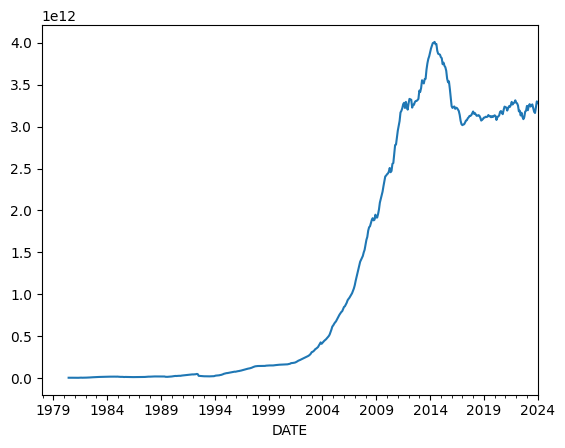

In [43]:
gold_reserves.TRESEGCNM052N.plot.line()

In [44]:
#  CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)

<Axes: xlabel='DATE'>

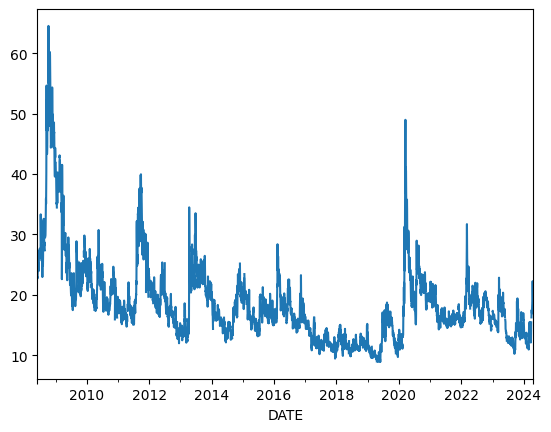

In [45]:
gold_volatility.GVZCLS.plot.line()

In [46]:
#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)

<Axes: xlabel='DATE'>

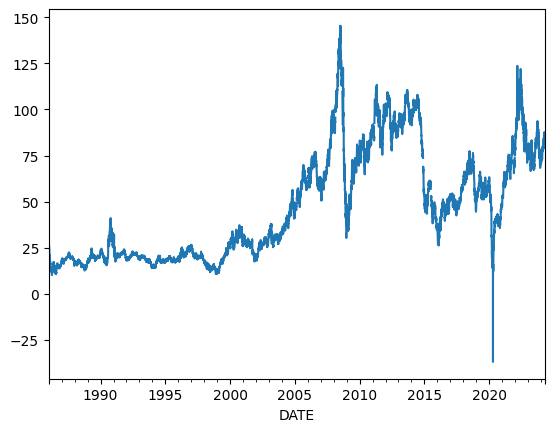

In [47]:
# there is a bug in the data? negative price?
oil_wti.DCOILWTICO.plot.line()

In [48]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU)
# https://fred.stlouisfed.org/series/DCOILBRENTEU
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start)

<Axes: xlabel='DATE'>

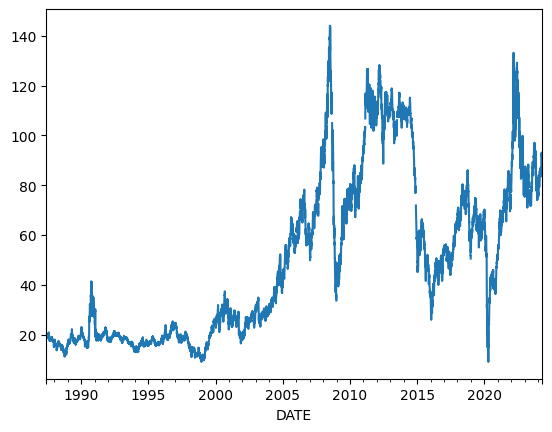

In [49]:
oil_brent.DCOILBRENTEU.plot.line()

In [50]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [51]:

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0    Last  Previous  Highest    Lowest  \
0                   Currency   106.0     106.0   165.00     70.70   
1               Stock Market  5072.0    5071.0  5268.00      4.40   
2            GDP Growth Rate     3.4       4.9    34.80    -28.00   
3     GDP Annual Growth Rate     3.1       2.9    13.40     -7.50   
4          Unemployment Rate     3.8       3.9    14.90      2.50   
5          Non Farm Payrolls   303.0     270.0  4615.00 -20477.00   
6             Inflation Rate     3.5       3.2    23.70    -15.80   
7         Inflation Rate MoM     0.4       0.4     2.00     -1.80   
8              Interest Rate     5.5       5.5    20.00      0.25   
9           Balance of Trade   -68.9     -67.6     1.95   -103.00   
10           Current Account  -195.0    -196.0     9.96   -284.00   
11    Current Account to GDP    -3.0      -3.8     0.20     -6.00   
12    Government Debt to GDP   129.0     127.0   129.00     31.80   
13         Government Budget    -5

In [52]:
df

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Currency,106.0,106.0,165.00,70.70,NaN,Apr/24
1,Stock Market,5072.0,5071.0,5268.00,4.40,points,Apr/24
2,GDP Growth Rate,3.4,4.9,34.80,-28.00,percent,Dec/23
3,GDP Annual Growth Rate,3.1,2.9,13.40,-7.50,percent,Dec/23
4,Unemployment Rate,3.8,3.9,14.90,2.50,percent,Mar/24
5,Non Farm Payrolls,303.0,270.0,4615.00,-20477.00,Thousand,Mar/24
6,Inflation Rate,3.5,3.2,23.70,-15.80,percent,Mar/24
7,Inflation Rate MoM,0.4,0.4,2.00,-1.80,percent,Mar/24
8,Interest Rate,5.5,5.5,20.00,0.25,percent,Mar/24
9,Balance of Trade,-68.9,-67.6,1.95,-103.00,USD Billion,Feb/24


## 2.5) Financial reporting - EDGAR (in Yahoo)

In [53]:
# let's check for NVDA
nvda =  yf.Ticker('NVDA')

In [54]:
# yearly financials for the last 4 years
nvda.financials


,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Tax Effect Of Unusual Items,0.0,-284130000.0,0.0,0.0
Tax Rate For Calcs,0.12,0.21,0.019,0.017
Normalized EBITDA,35583000000.0,7340000000.0,11351000000.0,5691000000.0
Total Unusual Items,0.0,-1353000000.0,0.0,0.0
Total Unusual Items Excluding Goodwill,0.0,-1353000000.0,0.0,0.0
Net Income From Continuing Operation Net Minority Interest,29760000000.0,4368000000.0,9752000000.0,4332000000.0
Reconciled Depreciation,1508000000.0,1544000000.0,1174000000.0,1098000000.0
Reconciled Cost Of Revenue,16621000000.0,11618000000.0,9439000000.0,6279000000.0
EBITDA,35583000000.0,5987000000.0,11351000000.0,5691000000.0
EBIT,34075000000.0,4443000000.0,10177000000.0,4593000000.0


In [55]:
# balance sheet
nvda.balance_sheet

,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,1380000000.0
Ordinary Shares Number,2464000000.0,2466136572.0,2506000000.0,2480000000.0
Share Issued,2464000000.0,2466136572.0,2506000000.0,3860000000.0
Net Debt,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,11056000000.0,12031000000.0,11831000000.0,7597000000.0
...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,25984000000.0,13296000000.0,21208000000.0,11561000000.0
Other Short Term Investments,18704000000.0,9907000000.0,19218000000.0,10714000000.0


In [56]:
# Basic info:
nvda.basic_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [57]:
# marketCap is quite useful, but don't know when it was updated? Daily?
nvda.basic_info['marketCap']/1e9

1995.2554321289062

In [58]:
# read this article for full info: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

## 2.6 Web Scraping - company info for clustering

In [59]:
# ask chatGPT: emulate clicking the link and downloading the content
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

CSV file downloaded successfully.


In [60]:
global_stocks = pd.read_csv("/content/global_stocks.csv")

In [61]:
global_stocks.head()

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Microsoft,MSFT,3037415342080,408.780,United States
1,2,Apple,AAPL,2609758339072,169.005,United States
2,3,NVIDIA,NVDA,1995624939520,798.250,United States
3,4,Alphabet (Google),GOOG,1989730893824,160.945,United States
4,5,Saudi Aramco,2222.SR,1942833479038,8.030,Saudi Arabia


In [62]:
global_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         8386 non-null   int64  
 1   Name         8386 non-null   object 
 2   Symbol       8385 non-null   object 
 3   marketcap    8386 non-null   int64  
 4   price (USD)  8386 non-null   float64
 5   country      8384 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 393.2+ KB


# HOMEWORK 1


In [63]:
#Q1

#Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1)

gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [64]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1

In [65]:
gdpc1.tail()

,GDPC1,gdpc1_us_yoy
DATE,,
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


In [66]:
avg_grth_2023 = np.average(gdpc1.tail(4).gdpc1_us_yoy)

In [67]:
print(avg_grth_2023)

0.02540443392867625


In [68]:
print('ANS1: ', round(avg_grth_2023*100, 1))

ANS1:  2.5


In [69]:
#Q2

#Download DGS2 and DGS10 interest rates series. DGS = Deposit Guarantee Schema
#https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10


In [70]:
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)

In [71]:
dgs2.tail()

,DGS2
DATE,
2024-04-16,4.97
2024-04-17,4.93
2024-04-18,4.98
2024-04-19,4.97
2024-04-22,4.97


In [72]:
dgs_10_2 = dgs10.join(dgs2, on="DATE")

In [73]:
dgs_10_2.tail()

,DGS10,DGS2
DATE,,
2024-04-16,4.67,4.97
2024-04-17,4.59,4.93
2024-04-18,4.64,4.98
2024-04-19,4.62,4.97
2024-04-22,4.62,4.97


In [74]:
dgs_10_2['diff_dgs10_dgs2'] = dgs_10_2['DGS10'] - dgs_10_2['DGS2']

In [75]:
dgs_10_2.tail()

,DGS10,DGS2,diff_dgs10_dgs2
DATE,,,
2024-04-16,4.67,4.97,-0.30
2024-04-17,4.59,4.93,-0.34
2024-04-18,4.64,4.98,-0.34
2024-04-19,4.62,4.97,-0.35
2024-04-22,4.62,4.97,-0.35


In [76]:
dgs_10_2.head()

,DGS10,DGS2,diff_dgs10_dgs2
DATE,,,
1962-01-02,4.06,NaN,NaN
1962-01-03,4.03,NaN,NaN
1962-01-04,3.99,NaN,NaN
1962-01-05,4.02,NaN,NaN
1962-01-08,4.03,NaN,NaN


In [77]:
dgs_10_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16255 entries, 1962-01-02 to 2024-04-22
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DGS10            15562 non-null  float64
 1   DGS2             11970 non-null  float64
 2   diff_dgs10_dgs2  11970 non-null  float64
dtypes: float64(3)
memory usage: 508.0 KB


In [78]:
start_2000 = date(year=2000, month=1, day=1)
print(f'Period for indexes: {start_2000} to {end} ')

Period for indexes: 2000-01-01 to 2024-04-24 


In [79]:
df2 = dgs_10_2.loc[dgs_10_2.index >= '2020-01-01']

In [80]:
df2.head()

,DGS10,DGS2,diff_dgs10_dgs2
DATE,,,
2020-01-01,NaN,NaN,NaN
2020-01-02,1.88,1.58,0.30
2020-01-03,1.80,1.53,0.27
2020-01-06,1.81,1.54,0.27
2020-01-07,1.83,1.54,0.29


In [81]:
min_diff = np.min(df2['diff_dgs10_dgs2'])

In [82]:
print('ANS2: ', round(min_diff, 1))

ANS2:  -1.1


In [83]:
#Q3
#Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/)
#and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/)

In [84]:
s_p_daily_5Y = yf.download(tickers='^GSPC',start='2019-04-09',end='2024-04-09')

[*********************100%%**********************]  1 of 1 completed


In [85]:
s_p_daily_5Y.info()  #252*5=1260

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-04-09 to 2024-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [86]:
ipc_mex_daily_5Y = yf.download(tickers='^MXX',start='2019-04-09',end='2024-04-09')

[*********************100%%**********************]  1 of 1 completed


In [87]:
s_p_daily_5Y.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000


In [88]:
s_p_daily_5Y.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,2886.580078,2886.879883,2873.330078,2878.199951,2878.199951,3032480000


In [89]:
ipc_mex_daily_5Y.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-08,58021.660156,58192.320312,57749.441406,57989.941406,57989.941406,154641800


In [90]:
ipc_mex_daily_5Y.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,45346.828125,45346.828125,44854.53125,45151.628906,45151.628906,191575000


In [91]:
s_p_daily_5Y['Close'][-1]/s_p_daily_5Y['Close'][0]

1.8075151917783085

In [92]:
s_p_growth = round((s_p_daily_5Y['Adj Close'][-1]/s_p_daily_5Y['Adj Close'][0] - 1)*100,0)
print(s_p_growth)

81.0


In [93]:
ipc_mex_growth = round((ipc_mex_daily_5Y['Adj Close'][-1]/ipc_mex_daily_5Y['Adj Close'][0] - 1)*100,0)
print(ipc_mex_growth)

28.0


In [94]:
#ANS3: 81.0

In [95]:
#Q4
#Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/)

In [96]:
top1_daily = yf.download(tickers='2222.SR',start='2023-01-01',end='2023-12-31')
top2_daily = yf.download(tickers='BRK-B',start='2023-01-01',end='2023-12-31')
top3_daily = yf.download(tickers='AAPL',start='2023-01-01',end='2023-12-31')
top4_daily = yf.download(tickers='MSFT',start='2023-01-01',end='2023-12-31')
top5_daily = yf.download(tickers='GOOG',start='2023-01-01',end='2023-12-31')
top6_daily = yf.download(tickers='JPM',start='2023-01-01',end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [97]:
lrr1=round((max(top1_daily['Adj Close']) - min(top1_daily['Adj Close']))/max(top1_daily['Adj Close']),2)
lrr2=round((max(top2_daily['Adj Close']) - min(top2_daily['Adj Close']))/max(top2_daily['Adj Close']),2)
lrr3=round((max(top3_daily['Adj Close']) - min(top3_daily['Adj Close']))/max(top3_daily['Adj Close']),2)
lrr4=round((max(top4_daily['Adj Close']) - min(top4_daily['Adj Close']))/max(top4_daily['Adj Close']),2)
lrr5=round((max(top5_daily['Adj Close']) - min(top5_daily['Adj Close']))/max(top5_daily['Adj Close']),2)
lrr6=round((max(top6_daily['Adj Close']) - min(top6_daily['Adj Close']))/max(top6_daily['Adj Close']),2)

print('ANS4: ', max(lrr1,lrr2,lrr3,lrr4,lrr5,lrr6))

ANS4:  0.42


In [ ]:
#Q5
#top1 '2222.SR'
#top2 'BRK-B'
#top3 'AAPL'
#top4 'MSFT'
#top5 'GOOG'
#top6 'JPM'


In [99]:
top1 = yf.Ticker('2222.SR')
top2 = yf.Ticker('BRK-B')
top3 = yf.Ticker('AAPL')
top4 = yf.Ticker('MSFT')
top5 = yf.Ticker('GOOG')
top6 = yf.Ticker('JPM')

top1_2023 = top1.history(start='2023-01-01',end='2023-12-31')
top2_2023 = top2.history(start='2023-01-01',end='2023-12-31')
top3_2023 = top3.history(start='2023-01-01',end='2023-12-31')
top4_2023 = top4.history(start='2023-01-01',end='2023-12-31')
top5_2023 = top5.history(start='2023-01-01',end='2023-12-31')
top6_2023 = top6.history(start='2023-01-01',end='2023-12-31')

In [100]:
top1_2023.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-01 00:00:00+03:00,28.256072,28.475792,28.212128,28.475792,1569087,0.0,0.0


In [102]:
div_yield1 = sum(top1_2023['Dividends'])/top1_daily['Adj Close'][-1]
div_yield2 = sum(top2_2023['Dividends'])/top2_daily['Adj Close'][-1]
div_yield3 = sum(top3_2023['Dividends'])/top3_daily['Adj Close'][-1]
div_yield4 = sum(top4_2023['Dividends'])/top4_daily['Adj Close'][-1]
div_yield5 = sum(top5_2023['Dividends'])/top5_daily['Adj Close'][-1]
div_yield6 = sum(top6_2023['Dividends'])/top6_daily['Adj Close'][-1]


In [106]:
print(div_yield1,'\n',
      div_yield2,'\n',
      div_yield3,'\n',
      div_yield4,'\n',
      div_yield5,'\n',
      div_yield6)

0.027701498195032558 
 0.0 
 0.004940592304162832 
 0.007433143940964608 
 0.0 
 0.024096079718909574


In [109]:
print('ANS5: ', round(max(div_yield1,div_yield2,div_yield3,div_yield4,div_yield5,div_yield6)*100,1))

ANS5:  2.8


In [ ]:
#Q6
#https://companiesmarketcap.com/european-union/largest-companies-in-the-eu-by-market-cap/
#TOP10: NVO, MC.PA, ASML, RMS.PA, OR.PA, SAP, ACN, TTE, IDEXI, SIE.DE

In [110]:
#https://en.wikipedia.org/wiki/Borsa_Italiana
#Euronext's acquisition of the Italian Bourse was completed on 29 April 2021
euronext_100 = yf.Ticker('^N100')

In [115]:
#euronext_100.info
euronext_100.history(period='1mo')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-25 00:00:00+01:00,1515.030029,1521.189941,1512.119995,1518.729980,238452800,0.0,0.0
2024-03-26 00:00:00+01:00,1518.609985,1525.050049,1517.040039,1523.290039,262183200,0.0,0.0
2024-03-27 00:00:00+01:00,1522.709961,1528.390015,1522.709961,1524.880005,255125900,0.0,0.0
2024-03-28 00:00:00+01:00,1525.130005,1530.859985,1525.130005,1526.339966,314297300,0.0,0.0
2024-04-02 00:00:00+02:00,1527.119995,1540.310059,1520.569946,1521.000000,367598800,0.0,0.0
2024-04-03 00:00:00+02:00,1521.569946,1531.619995,1520.400024,1531.459961,312327300,0.0,0.0
2024-04-04 00:00:00+02:00,1531.729980,1537.050049,1529.569946,1529.900024,253851400,0.0,0.0
2024-04-05 00:00:00+02:00,1526.030029,1526.030029,1510.349976,1520.099976,387210200,0.0,0.0
2024-04-08 00:00:00+02:00,1519.920044,1533.859985,1518.579956,1530.969971,228447600,0.0,0.0
